In [60]:
import numpy as np
import struct

def load_binary(filename):
    with open(filename, 'rb') as f:
        # 行数・列数を取得 (size_t は 8バイトで保存されている想定)
        rows = struct.unpack('Q', f.read(8))[0]
        cols = struct.unpack('Q', f.read(8))[0]
        # データ部分を一括で取得
        data = np.fromfile(f, dtype=np.float64, count=rows * cols)
        return data.reshape((rows, cols))

# 使い方例
data = load_binary('../vlasov_result_sin/data.bin')
print(data.shape)

(100001, 10000)


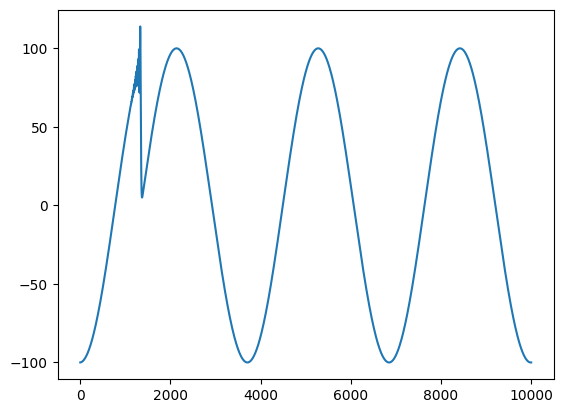

In [59]:
import matplotlib.pyplot as plt
plt.plot(data[9000,:])

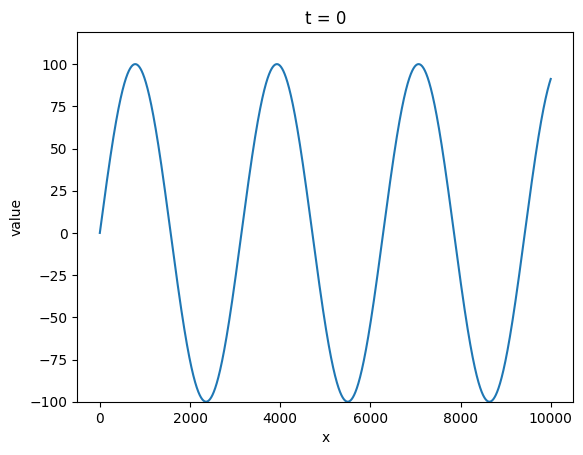

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ---- データ例（サンプル）----
# 実際にはあなたの data (N, M) を使ってください
N, M = data.shape
x = np.arange(M)

# ---- アニメーション部分 ----


fig, ax = plt.subplots()
line, = ax.plot(x, data[0, :])  # 最初のフレーム
ax.set_ylim(data.min(), data.max())
ax.set_xlabel("x")
ax.set_ylabel("value")
ax.set_title("t = 0")

def update(frame):
    """フレームを更新する関数"""
    line.set_ydata(data[frame, :])
    ax.set_title(f"t = {frame}")
    return line,
frame_num=1000
visualize_step=N//frame_num
frames=np.array([i*visualize_step for i in range(frame_num)])

ani = FuncAnimation(fig, update, frames, interval=100, blit=True)

plt.show()

In [ ]:
ani.save("c01.gif", writer="imagemagick") 

MovieWriter imagemagick unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4